In [14]:
import sys
import matplotlib.pyplot as plt

sys.path.append('../scripts')
from btsc_dataset import load_training, split_images_and_labels, resize_images

In [15]:
def plot_images_and_labels(images, labels):
    def first_image_with_label(label): return images[labels.index(label)]
    
    plt.figure(figsize=(15, 15))

    unique_labels = set(labels)
    for (idx, label) in enumerate(unique_labels, 1):
        plt.subplot(8, 8, idx)
        plt.axis('off')
        plt.title(f'{label} ({labels.count(label)})')
        plt.imshow(first_image_with_label(label))

    plt.show()

In [16]:
training_data = load_training()

In [17]:
(orig_images, orig_labels) = split_images_and_labels(training_data)

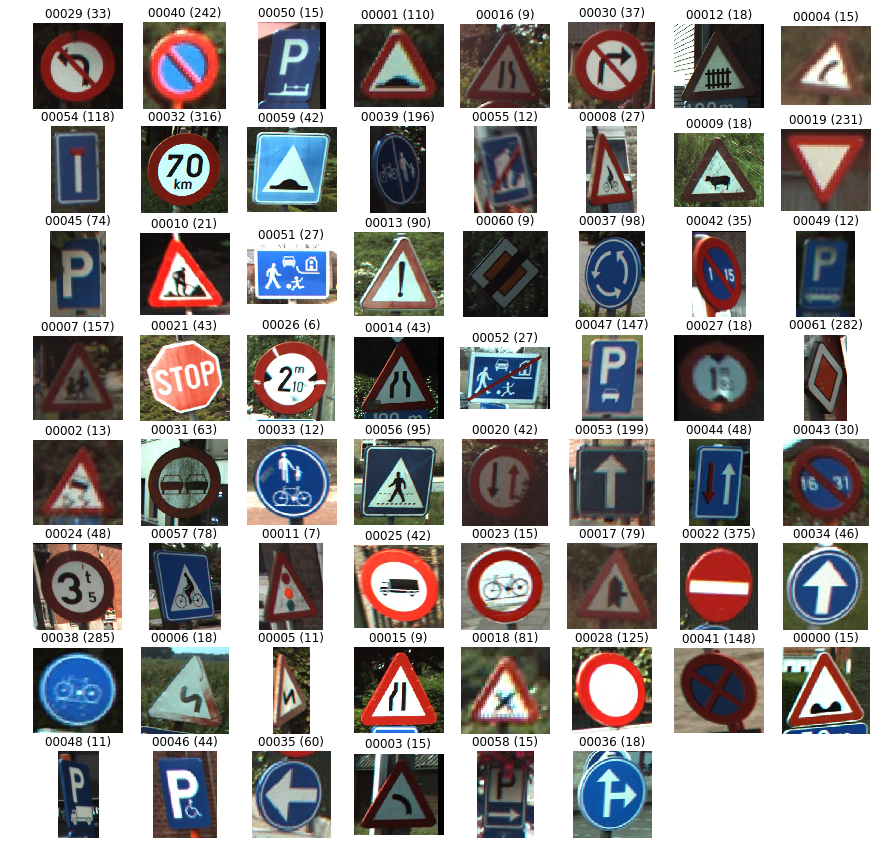

In [18]:
plot_images_and_labels(orig_images, orig_labels)

In [19]:
# TODO: Create plot_images_with_label()

In [20]:
resized_training_data = resize_images(training_data, size=32)
(resized_images, resized_labels) = split_images_and_labels(resized_training_data)

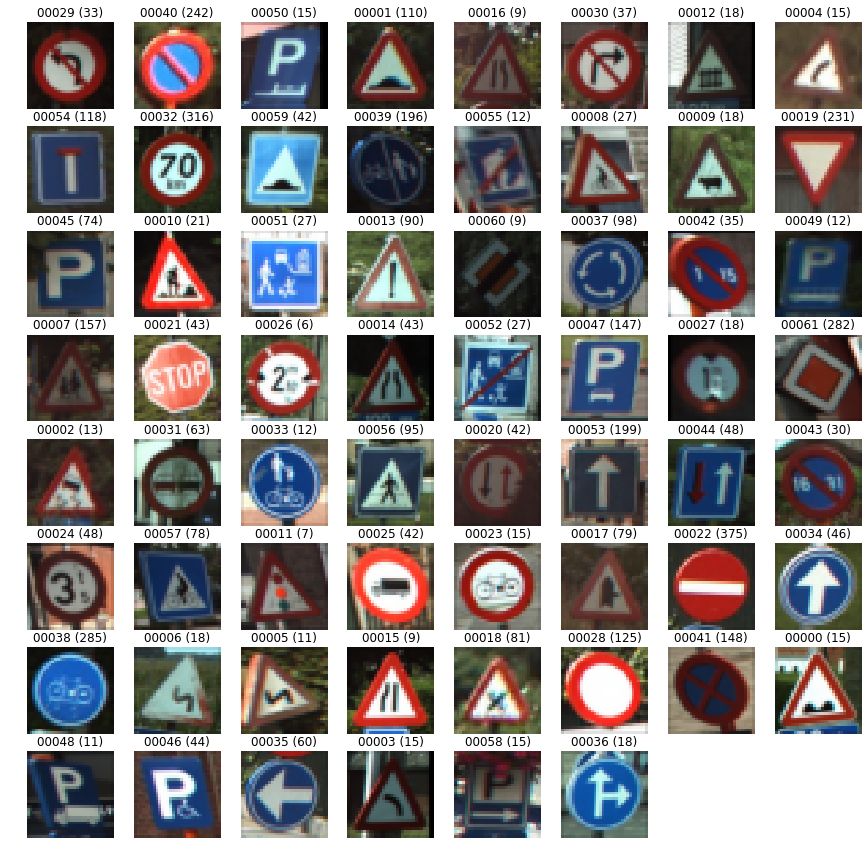

In [21]:
plot_images_and_labels(resized_images, resized_labels)

In [22]:
print('Total Unique Labels:', len(unique_labels))

Total Unique Labels: 62


In [23]:
from keras.models import *
from keras.layers import *
from keras.utils  import *

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(62, activation='relu'))
model.add(Dense(62, activation='softmax'))

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Y = np.array(resized_labels)

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
categorical_Y = to_categorical(encoded_Y)

X = np.array(resized_images)

X_train, X_test, Y_train, Y_test = train_test_split(X, categorical_Y, test_size=0.33, random_state=42)

print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print()
print('encoded_Y:', encoded_Y)
print('categorical_Y:', categorical_Y)

(4575, 32, 32, 3)
(4575,)
(3065, 32, 32, 3)
(3065, 62)
(1510, 32, 32, 3)
(1510, 62)

encoded_Y: [ 0  0  0 ... 61 61 61]
categorical_Y: [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=5, epochs=10, verbose=1)

Epoch 1/10
3065/3065 [==============================] - 6s 2ms/step - loss: 2.1239 - acc: 0.5194
Epoch 2/10
3065/3065 [==============================] - 5s 2ms/step - loss: 0.7725 - acc: 0.8150
Epoch 3/10
3065/3065 [==============================] - 5s 2ms/step - loss: 0.3795 - acc: 0.9064
Epoch 4/10
3065/3065 [==============================] - 5s 2ms/step - loss: 0.1996 - acc: 0.9517
Epoch 5/10
3065/3065 [==============================] - 5s 2ms/step - loss: 0.1182 - acc: 0.9736
Epoch 6/10
3065/3065 [==============================] - 5s 2ms/step - loss: 0.0710 - acc: 0.9843
Epoch 7/10
3065/3065 [==============================] - 5s 2ms/step - loss: 0.0425 - acc: 0.9899
Epoch 8/10
3065/3065 [==============================] - 5s 2ms/step - loss: 0.0388 - acc: 0.9915
Epoch 9/10
3065/3065 [==============================] - 5s 2ms/step - loss: 0.0423 - acc: 0.9918
Epoch 10/10
3065/3065 [==============================] - 5s 2ms/step - loss: 0.0205 - acc: 0.9954


In [26]:
loss, acc = model.evaluate(X_test, Y_test, verbose=1)

print('Loss:', loss)
print('Accuracy:', acc)

1510/1510 [==============================] - 0s 323us/step
Loss: 0.189716437305185
Accuracy: 0.9655629139072848
